In [3]:
# %pip install -q pandas numpy
# %pip install matplotlib

# %pip install tensorflow scikit-learn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

In [5]:
total_consumption_df = pd.read_csv(r"Calkowita_konsumpcja_dla_Polski/Total Load - Day Ahead _ Actual_202301010000-202401010000.csv")
sell_prices_df = pd.read_csv(r"Cena_sprzedazy_energii\PL_CENY_RYN_EN_2023.csv")
energy_production_df = pd.read_csv(r"Produkcja_energii\ninja_pv_50.1400_20.0637_corrected.csv")
consumption_profile_hourly_df = pd.read_csv(r"Profil_konsumpcji\profil_konsumpcji_godzinowo.csv")
consumption_profile_monthly_df = pd.read_csv(r"Profil_konsumpcji\profil_konsumpcji_po_miesiacu.csv")


In [6]:
total_consumption_df.head() 

,Time (CET/CEST),Day-ahead Total Load Forecast [MW] - BZN|PL,Actual Total Load [MW] - BZN|PL
0,01.01.2023 00:00 - 01.01.2023 01:00,14037.0,13272.0
1,01.01.2023 01:00 - 01.01.2023 02:00,13136.0,12509.0
2,01.01.2023 02:00 - 01.01.2023 03:00,12580.0,11845.0
3,01.01.2023 03:00 - 01.01.2023 04:00,12110.0,11462.0
4,01.01.2023 04:00 - 01.01.2023 05:00,11967.0,11454.0


In [7]:
sell_prices_df.head()

,Data,Godzina,RCE
0,20230101,1,75.01
1,20230101,2,29.43
2,20230101,3,29.05
3,20230101,4,29.26
4,20230101,5,28.94


<Axes: title={'center': 'Ceny sprzedaży energii w 2023 roku'}, xlabel='Date'>

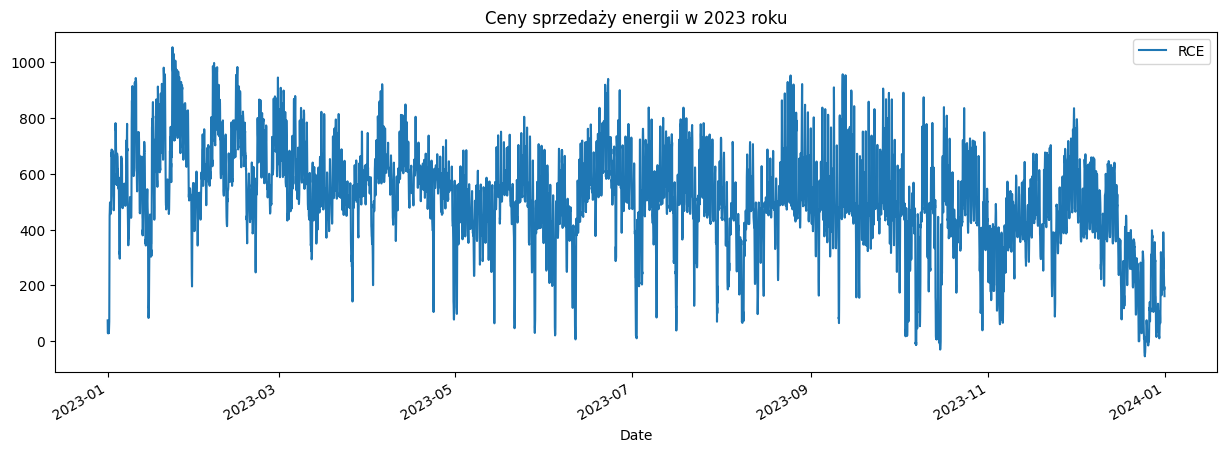

In [8]:
sell_prices_df['Date'] = pd.to_datetime(sell_prices_df['Data'].astype(str), format='%Y%m%d') + pd.to_timedelta(sell_prices_df['Godzina'] - 1, unit='h')

sell_prices_df.plot(x='Date', y='RCE', figsize=(15, 5), title='Ceny sprzedaży energii w 2023 roku')

In [9]:
energy_production_df.head()

,time,local_time,electricity
0,2019-01-01 00:00,2019-01-01 01:00,0.0
1,2019-01-01 01:00,2019-01-01 02:00,0.0
2,2019-01-01 02:00,2019-01-01 03:00,0.0
3,2019-01-01 03:00,2019-01-01 04:00,0.0
4,2019-01-01 04:00,2019-01-01 05:00,0.0


<Axes: title={'center': 'Energy Production Over Time'}, xlabel='Timestamp', ylabel='Power (kW)'>

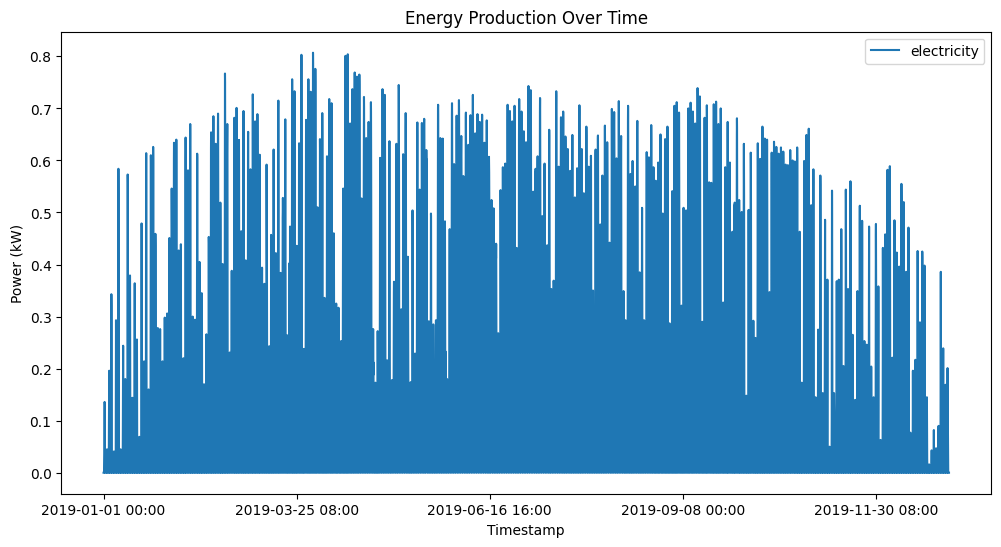

In [10]:
energy_production_df.plot(x='time', y='electricity', title='Energy Production Over Time', xlabel='Timestamp', ylabel='Power (kW)', figsize=(12, 6))

In [11]:
consumption_profile_hourly_df.head()


,Hour,Actual Total Load [%] - BZN|PL
0,00:00 - 01:00,3.546676
1,01:00 - 02:00,3.420083
2,02:00 - 03:00,3.350492
3,03:00 - 04:00,3.339817
4,04:00 - 05:00,3.377786


<Axes: title={'center': 'Monthly Consumption Profile'}, xlabel='Hour'>

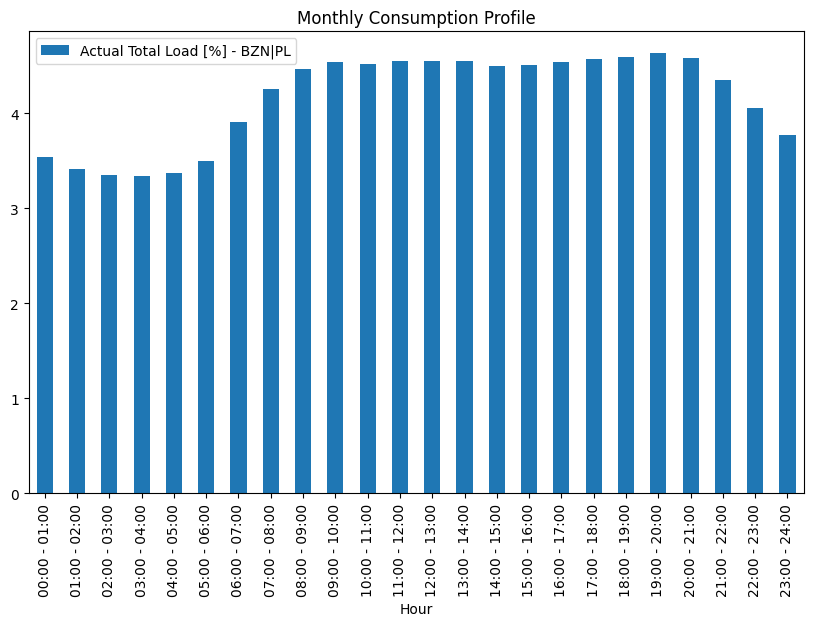

In [ ]:
consumption_profile_hourly_df.plot(x='Hour', y='Actual Total Load [%] - BZN|PL', kind='bar', figsize=(10, 6), title='Hour Consumption Profile')

In [13]:
consumption_profile_monthly_df.head()  


,Month,Actual Total Load [%] - BZN|PL
0,2023-01,9.087080
1,2023-02,8.410362
2,2023-03,8.963658
3,2023-04,7.946352
4,2023-05,7.777572


<Axes: title={'center': 'Monthly Consumption Profile'}, xlabel='Month'>

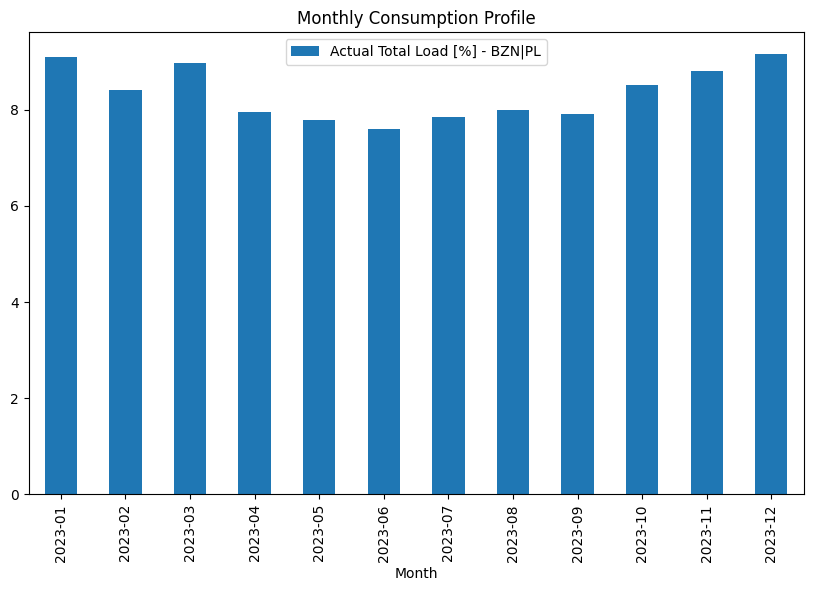

In [14]:
consumption_profile_monthly_df.plot(x='Month', y='Actual Total Load [%] - BZN|PL', kind='bar', figsize=(10, 6), title='Monthly Consumption Profile')

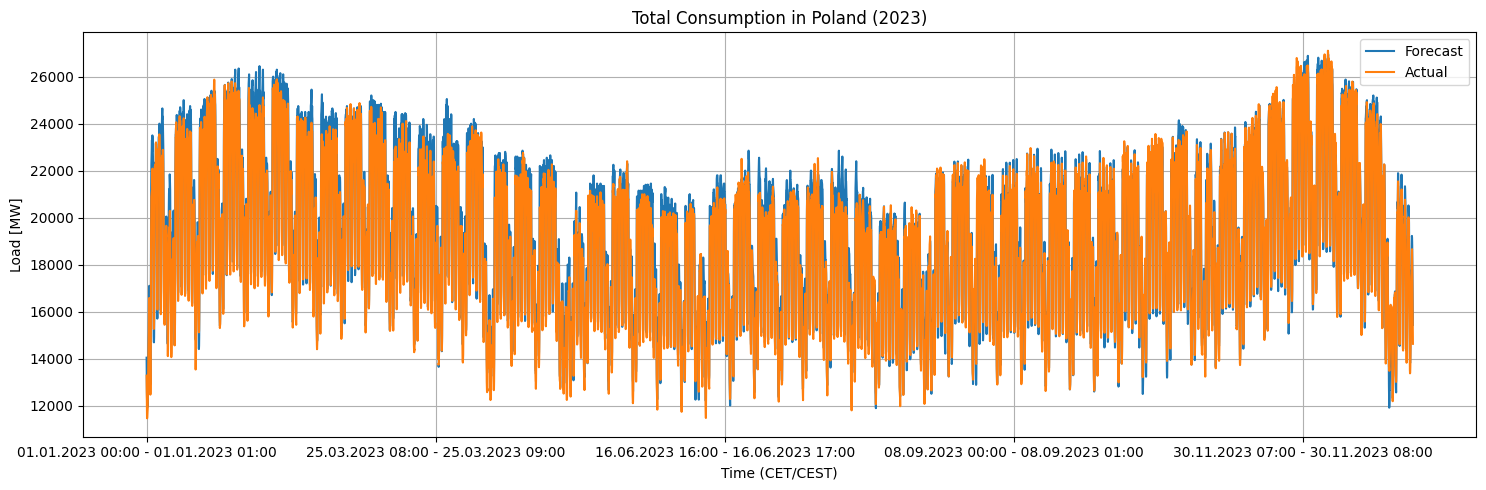

In [15]:
total_consumption_df.plot(
    x='Time (CET/CEST)',
    y=['Day-ahead Total Load Forecast [MW] - BZN|PL', 'Actual Total Load [MW] - BZN|PL'],
    figsize=(15, 5),
    title='Total Consumption in Poland (2023)'
)

plt.xlabel('Time (CET/CEST)')
plt.ylabel('Load [MW]')
plt.legend(['Forecast', 'Actual'])
plt.grid(True)
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

C:\Users\Julia\AppData\Local\Temp\ipykernel_17532\2142087679.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').agg({


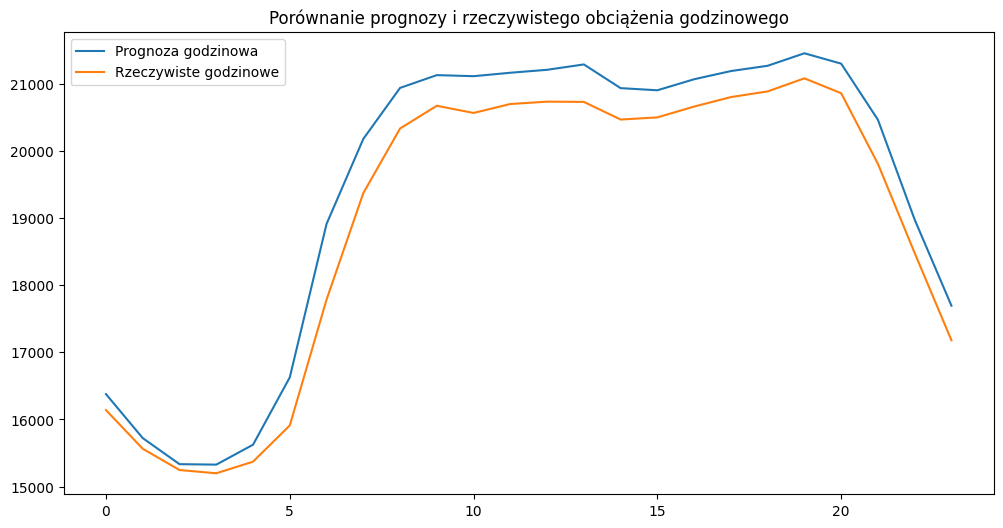

Średni błąd absolutny (MAE) dla danych godzinowych: 464.80513698630165
Średni błąd absolutny (MAE) dla danych dziennych: 522.1896446297399
Średni błąd absolutny (MAE) dla danych miesięcznych: 466.34647720492376


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv(r'Calkowita_konsumpcja_dla_Polski\Total Load - Day Ahead _ Actual_202301010000-202401010000.csv')

# Konwersja kolumny czasu
data['Time (CET/CEST)'] = pd.to_datetime(data['Time (CET/CEST)'].str.split(' - ').str[0], format='%d.%m.%Y %H:%M')
data.set_index('Time (CET/CEST)', inplace=True)

# Dodanie kolumn pomocniczych
data['Hour'] = data.index.hour
data['Day'] = data.index.day
data['Month'] = data.index.month

# Agregacja godzinowa
hourly_data = data.groupby('Hour').agg({
    'Day-ahead Total Load Forecast [MW] - BZN|PL': 'mean',
    'Actual Total Load [MW] - BZN|PL': 'mean'
})

# Agregacja dzienna
daily_data = data.resample('D').agg({
    'Day-ahead Total Load Forecast [MW] - BZN|PL': 'mean',
    'Actual Total Load [MW] - BZN|PL': 'mean'
})

# Agregacja miesięczna
monthly_data = data.resample('M').agg({
    'Day-ahead Total Load Forecast [MW] - BZN|PL': 'mean',
    'Actual Total Load [MW] - BZN|PL': 'mean'
})

# Obliczenie błędów
hourly_data['Error'] = hourly_data['Day-ahead Total Load Forecast [MW] - BZN|PL'] - hourly_data['Actual Total Load [MW] - BZN|PL']
daily_data['Error'] = daily_data['Day-ahead Total Load Forecast [MW] - BZN|PL'] - daily_data['Actual Total Load [MW] - BZN|PL']
monthly_data['Error'] = monthly_data['Day-ahead Total Load Forecast [MW] - BZN|PL'] - monthly_data['Actual Total Load [MW] - BZN|PL']

# Wizualizacja
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['Day-ahead Total Load Forecast [MW] - BZN|PL'], label='Prognoza godzinowa')
plt.plot(hourly_data.index, hourly_data['Actual Total Load [MW] - BZN|PL'], label='Rzeczywiste godzinowe')
plt.legend()
plt.title('Porównanie prognozy i rzeczywistego obciążenia godzinowego')
plt.show()

# Wybór najlepszej opcji na podstawie MAE
mae_hourly = hourly_data['Error'].abs().mean()
mae_daily = daily_data['Error'].abs().mean()
mae_monthly = monthly_data['Error'].abs().mean()

print(f'Średni błąd absolutny (MAE) dla danych godzinowych: {mae_hourly}')
print(f'Średni błąd absolutny (MAE) dla danych dziennych: {mae_daily}')
print(f'Średni błąd absolutny (MAE) dla danych miesięcznych: {mae_monthly}')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.model_selection import train_test_split

# Wczytanie danych
df = pd.read_csv(r'Cena_sprzedazy_energii\PL_CENY_RYN_EN_2023.csv', parse_dates=['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df = df.sort_values('Data')

# Agregacja do danych dziennych (średnia cena dzienna)
daily_df = df.groupby('Data')['RCE'].mean().reset_index()
daily_df.columns = ['ds', 'y']

# Podział na zbiór treningowy i testowy
train_size = int(len(daily_df) * 0.8)
train, test = daily_df.iloc[:train_size], daily_df.iloc[train_size:]

## 1. Model SARIMA
def evaluate_sarima(train, test, order=(1,1,1), seasonal_order=(1,2,1,24)):
    model = SARIMAX(train['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    predictions = model_fit.forecast(steps=len(test))
    mae = mean_absolute_error(test['y'], predictions)
    rmse = np.sqrt(mean_squared_error(test['y'], predictions))
    return mae, rmse, predictions

# Przykładowe wywołanie (należy dostroić parametry)
sarima_mae, sarima_rmse, sarima_preds = evaluate_sarima(train, test)


## 3. Model LSTM
def prepare_lstm_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_df[['y']])

n_steps = 7
X, y = prepare_lstm_data(scaled_data, n_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=0)

lstm_preds = model.predict(X_test)
lstm_preds = scaler.inverse_transform(lstm_preds)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

lstm_mae = mean_absolute_error(y_test_inv, lstm_preds)
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, lstm_preds))


c:\Users\Julia\Desktop\Dane\Dane\Rozszerzony__kalkulator\Uzycie_danych_godzinowych\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Julia\Desktop\Dane\Dane\Rozszerzony__kalkulator\Uzycie_danych_godzinowych\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Julia\Desktop\Dane\Dane\Rozszerzony__kalkulator\Uzycie_danych_godzinowych\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Epoch 1/80


c:\Users\pioac\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3270  
Epoch 2/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1682 
Epoch 3/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0445 
Epoch 4/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0279 
Epoch 5/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 
Epoch 6/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 
Epoch 7/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 
Epoch 8/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 
Epoch 9/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 
Epoch 10/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 
Epoch 11/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 
Epoch 12/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 
Epoch 13/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0154 
Epoch 14/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0147 
Epoch 15/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 
Epoch 16/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

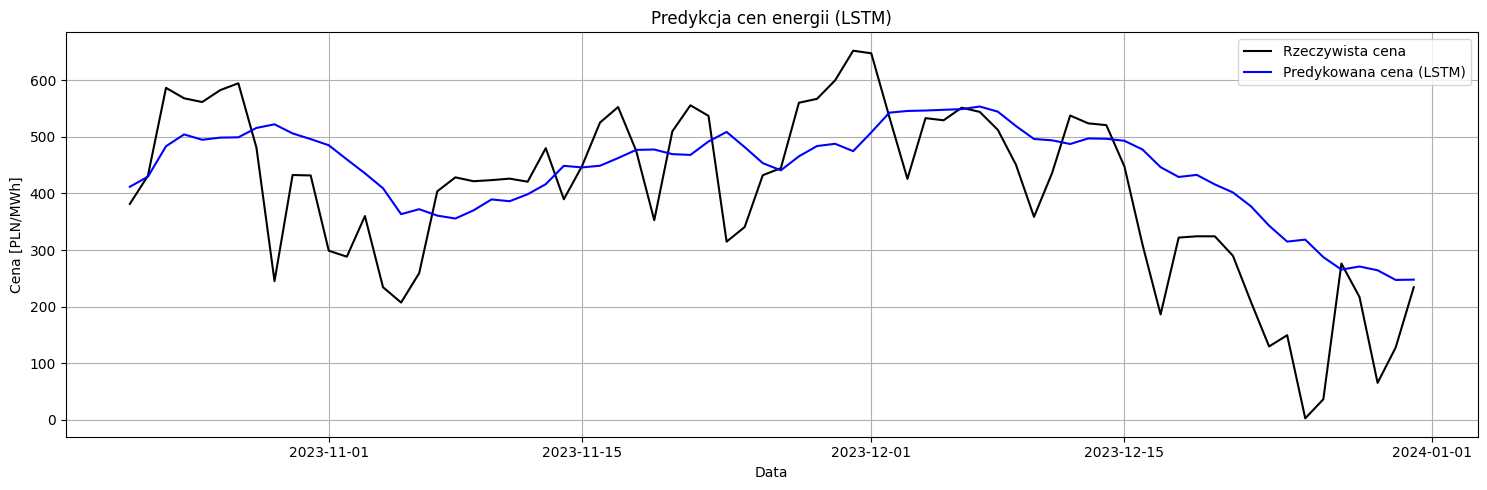

         Data  Rzeczywista cena  Predykowana cena     Różnica
0  2023-10-21        381.388333        411.593323   30.204989
1  2023-10-22        431.153333        429.550598   -1.602735
2  2023-10-23        586.347917        483.257416 -103.090501
3  2023-10-24        567.914583        504.131989  -63.782595
4  2023-10-25        561.344583        494.702057  -66.642526
..        ...               ...               ...         ...
67 2023-12-27        276.090000        265.431244  -10.658756
68 2023-12-28        216.951250        270.856354   53.905104
69 2023-12-29         65.392500        264.173157  198.780657
70 2023-12-30        127.799583        247.135040  119.335457
71 2023-12-31        234.207917        247.671722   13.463806

[72 rows x 4 columns]


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Wczytanie i przygotowanie danych ===
df = pd.read_csv('Cena_sprzedazy_energii/PL_CENY_RYN_EN_2023.csv', parse_dates=['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df = df.sort_values('Data')

# Średnia dzienna cena
daily_df = df.groupby('Data')['RCE'].mean().reset_index()
daily_df.columns = ['ds', 'y']

# === 2. Skalowanie cen ===
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(daily_df[['y']])

# === 3. Tworzenie sekwencji do LSTM ===
def create_sequences(data, n_steps=7):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 7
X, y = create_sequences(scaled_prices, n_steps)

# === 4. Podział na zbiór treningowy/testowy ===
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === 5. Model LSTM ===
model = Sequential([
    LSTM(100, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=80, verbose=1)

# === 6. Predykcja i odwrócenie skalowania ===
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# === 7. Ocena ===
mae = mean_absolute_error(y_test_inv, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# === 8. Wykres ===
# Odpowiadające daty
test_dates = daily_df['ds'].iloc[-len(y_test):]

plt.figure(figsize=(15, 5))
plt.plot(test_dates, y_test_inv, label='Rzeczywista cena', color='black')
plt.plot(test_dates, y_pred, label='Predykowana cena (LSTM)', color='blue')
plt.title('Predykcja cen energii (LSTM)')
plt.xlabel('Data')
plt.ylabel('Cena [PLN/MWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Wypisz różnice między predykcją a rzeczywistością
diff = y_pred.flatten() - y_test_inv.flatten()
diff_df = pd.DataFrame({
    'Data': test_dates.values,
    'Rzeczywista cena': y_test_inv.flatten(),
    'Predykowana cena': y_pred.flatten(),
    'Różnica': diff
})
print(diff_df)

In [29]:
%pip install keras-tcn

Note: you may need to restart the kernel to use updated packages.


Epoch 1/80


c:\Users\pioac\miniconda3\Lib\site-packages\tcn\tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 17.4672
Epoch 2/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0317
Epoch 3/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3427
Epoch 4/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1394
Epoch 5/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0548
Epoch 6/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0248
Epoch 7/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163
Epoch 8/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0107
Epoch 9/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118
Epoch 10/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127
Epoch 11/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106
Epoch 12/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092
Epoch 13/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092
Epoch 14/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0099
Epoch 15/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0089
Epoch 16/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

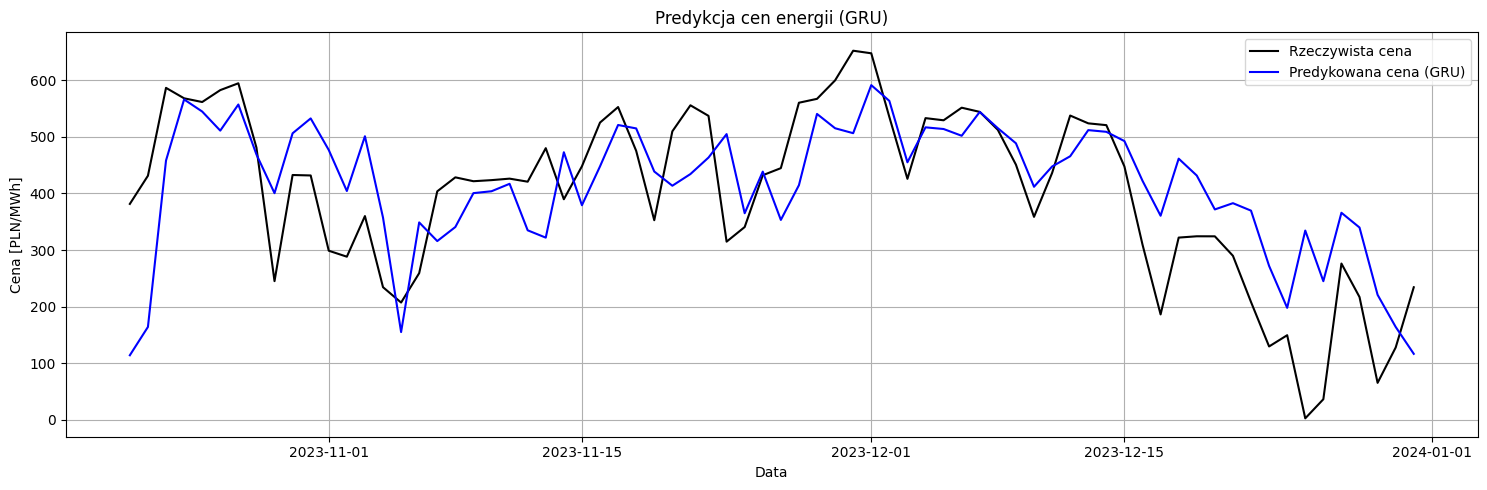

         Data  Rzeczywista cena  Predykowana cena     Różnica
0  2023-10-21        381.388333        114.098396 -267.289937
1  2023-10-22        431.153333        164.121002 -267.032331
2  2023-10-23        586.347917        458.022156 -128.325761
3  2023-10-24        567.914583        565.889160   -2.025423
4  2023-10-25        561.344583        544.550476  -16.794107
..        ...               ...               ...         ...
67 2023-12-27        276.090000        365.764435   89.674435
68 2023-12-28        216.951250        339.726044  122.774794
69 2023-12-29         65.392500        220.848526  155.456026
70 2023-12-30        127.799583        164.139252   36.339668
71 2023-12-31        234.207917        116.612610 -117.595307

[72 rows x 4 columns]


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tcn import TCN
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Wczytanie i przygotowanie danych ===
df = pd.read_csv('Cena_sprzedazy_energii/PL_CENY_RYN_EN_2023.csv', parse_dates=['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df = df.sort_values('Data')

# Średnia dzienna cena
daily_df = df.groupby('Data')['RCE'].mean().reset_index()
daily_df.columns = ['ds', 'y']

# === 2. Skalowanie cen ===
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(daily_df[['y']])

# === 3. Tworzenie sekwencji do LSTM ===
def create_sequences(data, n_steps=7):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 7
X, y = create_sequences(scaled_prices, n_steps)

# === 4. Podział na zbiór treningowy/testowy ===
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === 5. Model LSTM ===
model = Sequential([
    TCN(input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=80, verbose=1)

# === 6. Predykcja i odwrócenie skalowania ===
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# === 7. Ocena ===
mae = mean_absolute_error(y_test_inv, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# === 8. Wykres ===
# Odpowiadające daty
test_dates = daily_df['ds'].iloc[-len(y_test):]

plt.figure(figsize=(15, 5))
plt.plot(test_dates, y_test_inv, label='Rzeczywista cena', color='black')
plt.plot(test_dates, y_pred, label='Predykowana cena (GRU)', color='blue')
plt.title('Predykcja cen energii (GRU)')
plt.xlabel('Data')
plt.ylabel('Cena [PLN/MWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Wypisz różnice między predykcją a rzeczywistością
diff = y_pred.flatten() - y_test_inv.flatten()
diff_df = pd.DataFrame({
    'Data': test_dates.values,
    'Rzeczywista cena': y_test_inv.flatten(),
    'Predykowana cena': y_pred.flatten(),
    'Różnica': diff
})
print(diff_df)

In [43]:
%pip install xgboost 

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.4/150.0 MB 25.2 MB/s eta 0:00:06
   -- ------------------------------------- 10.7/150.0 MB 30.5 MB/s eta 0:00:05
   ---- ----------------------------------- 17.8/150.0 MB 32.1 MB/s eta 0:00:05
   ------ --------------------------------- 23.6/150.0 MB 31.8 MB/s eta 0:00:04
   -------- ------------------------------- 30.7/150.0 MB 30.9 MB/s eta 0:00:04
   ---------- ----------------------------- 37.7/150.0 MB 31.2 MB/s eta 0:00:04
   ----------- ---------------------------- 44.6/150.0 MB 31.2 MB/s eta 0:00:04
   ------------- -------------------------- 50.3/150.0 MB 30.5 MB/s eta 0:00:04
   -------------- ------------------------- 54.8/150.0 MB 29.8 MB/s eta 0:00:04
   --------------- ------------------------ 59.0/150.0 MB 28.7 MB/s eta 0:00:04
   ---------------- ----------------------- 63.2/150.0 MB 28.0 MB/s eta 0:00:04
   ----------------- ---------------------- 67.4/1

Random Forest - MAE: 84.02, RMSE: 110.02
XGBoost - MAE: 111.90, RMSE: 149.05


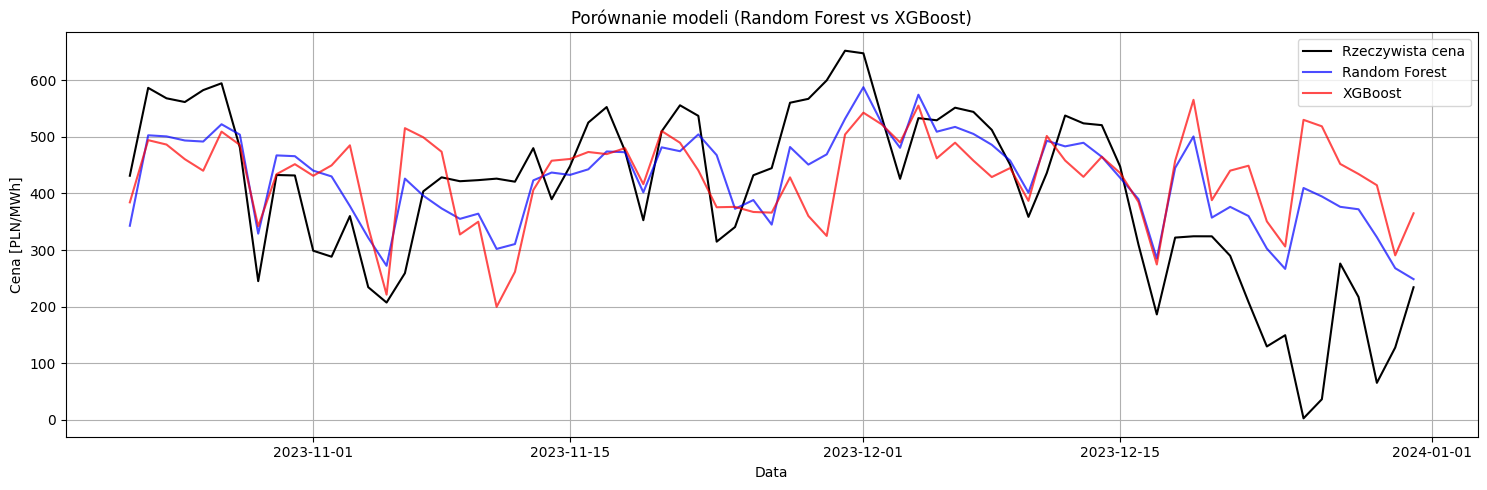

        Data  Rzeczywista_cena  Random_Forest     XGBoost    Błąd_RF  \
0 2023-10-22        431.153333     342.818379  384.157440 -88.334954   
1 2023-10-23        586.347917     502.595408  494.010010 -83.752508   
2 2023-10-24        567.914583     500.620204  486.218811 -67.294379   
3 2023-10-25        561.344583     493.401192  460.353699 -67.943392   
4 2023-10-26        582.375000     491.546450  440.014221 -90.828550   
5 2023-10-27        594.436250     522.085917  509.048279 -72.350333   
6 2023-10-28        480.879167     503.705596  485.524902  22.826429   
7 2023-10-29        245.024583     328.883471  341.920166  83.858887   
8 2023-10-30        432.447917     467.078050  433.950714  34.630133   
9 2023-10-31        431.647083     465.676675  451.570679  34.029592   

     Błąd_XGB  
0  -46.995893  
1  -92.337907  
2  -81.695772  
3 -100.990885  
4 -142.360779  
5  -85.387971  
6    4.645736  
7   96.895583  
8    1.502797  
9   19.923595  


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# === 1. Wczytanie i przygotowanie danych ===
df = pd.read_csv('Cena_sprzedazy_energii/PL_CENY_RYN_EN_2023.csv', parse_dates=['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df = df.sort_values('Data')

# Średnia dzienna cena
daily_df = df.groupby('Data')['RCE'].mean().reset_index()
daily_df.columns = ['ds', 'y']

# === 2. Tworzenie cech czasowych ===
def create_features(df):
    # Opóźnienia (lags)
    for lag in [1, 2, 3, 7, 14]:
        df[f'lag_{lag}'] = df['y'].shift(lag)
    
    # Statystyki kroczące
    df['rolling_mean_7'] = df['y'].rolling(7).mean()
    df['rolling_std_7'] = df['y'].rolling(7).std()
    
    # Cechy czasowe
    df['day_of_week'] = df['ds'].dt.dayofweek
    df['month'] = df['ds'].dt.month
    df['day_of_year'] = df['ds'].dt.dayofyear
    
    return df.dropna()

daily_df = create_features(daily_df)

# === 3. Podział na zbiór treningowy/testowy ===
X = daily_df.drop(['ds', 'y'], axis=1)
y = daily_df['y']

# Podział chronologiczny (zachowując kolejność czasową)
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# === 4. Trenowanie modeli ===
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# === 5. Predykcje ===
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# === 6. Ocena modeli ===
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_xgb, "XGBoost")

# === 7. Wykres ===
plt.figure(figsize=(15, 5))
plt.plot(daily_df['ds'].iloc[split_idx:], y_test, label='Rzeczywista cena', color='black')
plt.plot(daily_df['ds'].iloc[split_idx:], y_pred_rf, label='Random Forest', color='blue', alpha=0.7)
plt.plot(daily_df['ds'].iloc[split_idx:], y_pred_xgb, label='XGBoost', color='red', alpha=0.7)
plt.title('Porównanie modeli (Random Forest vs XGBoost)')
plt.xlabel('Data')
plt.ylabel('Cena [PLN/MWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Analiza różnic ===
diff_df = pd.DataFrame({
    'Data': daily_df['ds'].iloc[split_idx:].values,
    'Rzeczywista_cena': y_test.values,
    'Random_Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'Błąd_RF': y_pred_rf - y_test.values,
    'Błąd_XGB': y_pred_xgb - y_test.values
})
print(diff_df.head(10))

SARIMA MAE: 118.70, RMSE: 140.48


c:\Users\pioac\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


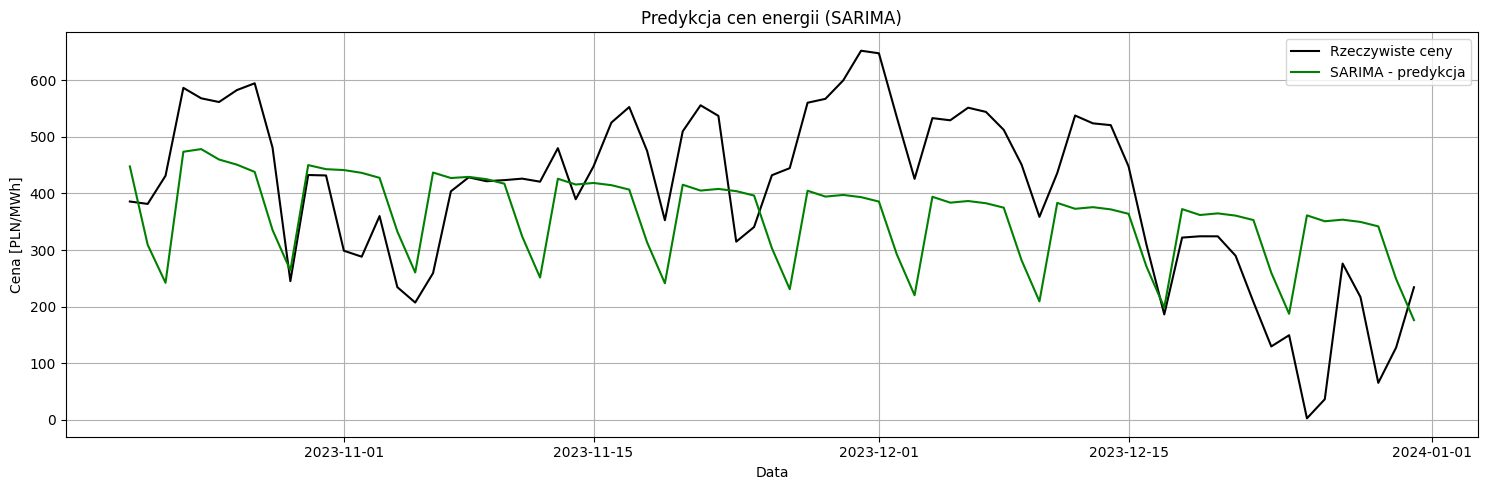

         Data  Rzeczywista cena  Predykowana cena     Różnica
0  2023-10-21        381.388333        411.593323   30.204989
1  2023-10-22        431.153333        429.550598   -1.602735
2  2023-10-23        586.347917        483.257416 -103.090501
3  2023-10-24        567.914583        504.131989  -63.782595
4  2023-10-25        561.344583        494.702057  -66.642526
..        ...               ...               ...         ...
67 2023-12-27        276.090000        265.431244  -10.658756
68 2023-12-28        216.951250        270.856354   53.905104
69 2023-12-29         65.392500        264.173157  198.780657
70 2023-12-30        127.799583        247.135040  119.335457
71 2023-12-31        234.207917        247.671722   13.463806

[72 rows x 4 columns]


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Wczytanie danych (jeśli jeszcze nie wczytane) ===
df = pd.read_csv('Cena_sprzedazy_energii/PL_CENY_RYN_EN_2023.csv', parse_dates=['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df = df.sort_values('Data')

# Średnia dzienna cena
daily_df = df.groupby('Data')['RCE'].mean().reset_index()
daily_df.columns = ['ds', 'y']

# === 2. Podział na zbiór treningowy/testowy ===
train_size = int(len(daily_df) * 0.8)
train, test = daily_df.iloc[:train_size], daily_df.iloc[train_size:]

# === 3. Dopasowanie modelu SARIMA ===
# Parametry SARIMA (należy dobrać lepiej np. przez grid search/AIC)
order = (1, 2, 3)
seasonal_order = (1, 1, 1, 7)  # tygodniowa sezonowość (dla danych dziennych)

model = SARIMAX(train['y'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# === 4. Prognoza ===
n_test = len(test)
sarima_preds = model_fit.forecast(steps=n_test)

# === 5. Ocena modelu ===
mae = mean_absolute_error(test['y'], sarima_preds)
rmse = np.sqrt(mean_squared_error(test['y'], sarima_preds))
print(f"SARIMA MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# === 6. Wykres ===
plt.figure(figsize=(15, 5))
plt.plot(test['ds'], test['y'], label='Rzeczywiste ceny', color='black')
plt.plot(test['ds'], sarima_preds, label='SARIMA - predykcja', color='green')
plt.title('Predykcja cen energii (SARIMA)')
plt.xlabel('Data')
plt.ylabel('Cena [PLN/MWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Wypisz różnice między predykcją a rzeczywistością
diff = y_pred.flatten() - y_test_inv.flatten()
diff_df = pd.DataFrame({
    'Data': test_dates.values,
    'Rzeczywista cena': y_test_inv.flatten(),
    'Predykowana cena': y_pred.flatten(),
    'Różnica': diff
})
print(diff_df)


In [55]:
%pip install --upgrade --force-reinstall numpy
%pip install --upgrade statsmodels pmdarima

  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


In [89]:
# %pip install numpy==1.21.0

In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Wczytanie danych ===
df = pd.read_csv('Cena_sprzedazy_energii/PL_CENY_RYN_EN_2023.csv', parse_dates=['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df = df.sort_values('Data')

# Średnia dzienna cena
daily_df = df.groupby('Data')['RCE'].mean().reset_index()
daily_df.columns = ['ds', 'y']

# === 2. Podział na zbiór treningowy/testowy ===
train_size = int(len(daily_df) * 0.8)
train, test = daily_df.iloc[:train_size], daily_df.iloc[train_size:]

# === 3. Automatyczny dobór parametrów SARIMA (auto_arima) ===
# Uwaga: auto_arima może działać długo dla dużych zbiorów danych!
model_auto = auto_arima(
    train['y'],
    seasonal=True,           # Uwzględnij sezonowość
    m=7,                     # Cykl sezonowy (7 dni dla danych dziennych)
    trace=True,              # Pokazuj postęp
    error_action='ignore',   # Ignoruj błędy dopasowania
    suppress_warnings=True,
    stepwise=True            # Szybsza optymalizacja
)

print(f"Znalezione parametry SARIMA: {model_auto.order}, sezonowe: {model_auto.seasonal_order}")

# === 4. Trenowanie modelu z dobranymi parametrami ===
model = SARIMAX(
    train['y'],
    order=model_auto.order,
    seasonal_order=model_auto.seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
model_fit = model.fit(disp=False)

# === 5. Prognoza ===
n_test = len(test)
sarima_preds = model_fit.forecast(steps=n_test)

# === 6. Ocena modelu ===
mae = mean_absolute_error(test['y'], sarima_preds)
rmse = np.sqrt(mean_squared_error(test['y'], sarima_preds))
print(f"SARIMA MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# === 7. Wykres ===
plt.figure(figsize=(15, 5))
plt.plot(test['ds'], test['y'], label='Rzeczywiste ceny', color='black')
plt.plot(test['ds'], sarima_preds, label='SARIMA - predykcja', color='green')
plt.title(f'Predykcja cen energii (SARIMA {model_auto.order}, sezonowe {model_auto.seasonal_order})')
plt.xlabel('Data')
plt.ylabel('Cena [PLN/MWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Analiza różnic ===
diff_df = pd.DataFrame({
    'Data': test['ds'].values,
    'Rzeczywista_cena': test['y'].values,
    'Predykowana_cena': sarima_preds,
    'Różnica': sarima_preds - test['y'].values
})
print(diff_df.head(10))

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [21]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Generowanie przykładowych danych zużycia energetycznego (jeśli nie mamy własnych)
np.random.seed(42)
date_range = pd.date_range(start='2010-01-01', end='2023-12-31', freq='M')
energy_consumption = 100 + 2 * np.arange(len(date_range)) + 10 * np.sin(
    np.arange(len(date_range)) * 0.5) + np.random.normal(0, 5, len(date_range))
data = pd.read_csv(r"Calkowita_konsumpcja_dla_Polski\Total Load - Day Ahead _ Actual_202301010000-202401010000.csv")
data.set_index('Date', inplace=True)

# Podział na zbiór treningowy i testowy
train = data.iloc[:-24]  # pierwsze N-24 miesiące jako treningowe
test = data.iloc[-24:]  # ostatnie 24 miesiące jako testowe

# Wizualizacja danych
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Energy_Consumption'], label='Trening')
plt.plot(test.index, test['Energy_Consumption'], label='Test')
plt.title('Zużycie energetyczne w czasie')
plt.xlabel('Data')
plt.ylabel('Zużycie')
plt.legend()
plt.grid()
plt.show()


# Test stacjonarności
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('Test ADF:')
    print(f'Statystyka ADF: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Wartości krytyczne:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    return result[1] > 0.05  # zwraca True jeśli szereg jest niestacjonarny


print("\nTest stacjonarności dla danych treningowych:")
non_stationary = test_stationarity(train['Energy_Consumption'])

if non_stationary:
    print("\nSzereg jest niestacjonarny - różnicowanie może być potrzebne.")
    # Różnicowanie
    train['Energy_diff'] = train['Energy_Consumption'].diff()
    train = train.dropna(subset=['Energy_diff'])  # usuwa tylko wiersze, gdzie 'Energy_diff' to NaN

    print("\nTest stacjonarności po różnicowaniu:")
    if test_stationarity(train['Energy_diff']):
        print("Szereg nadal niestacjonarny - potrzebne kolejne różnicowanie")
    else:
        print("Szereg jest teraz stacjonarny")
else:
    print("\nSzereg jest stacjonarny - można przejść do modelowania")

# Wykresy ACF i PACF do identyfikacji parametrów
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(train['Energy_Consumption'].dropna(), ax=plt.gca(), lags=24)
plt.subplot(212)
plot_pacf(train['Energy_Consumption'].dropna(), ax=plt.gca(), lags=24)
plt.tight_layout()
plt.show()


# Funkcja do ewaluacji modelu
def evaluate_model(model, train_data, test_data, order, seasonal_order=None):
    history = train_data.copy()
    predictions = []

    if seasonal_order:  # Dla SARIMA
        fitted_model = model(history['Energy_Consumption'],
                             order=order,
                             seasonal_order=seasonal_order,
                             enforce_stationarity=False,
                             enforce_invertibility=False).fit()
    else:  # Dla pozostałych modeli
        fitted_model = model(history['Energy_Consumption'],
                             order=order).fit()

    # Prognoza
    forecast = fitted_model.get_forecast(steps=len(test_data))
    predictions = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # Obliczenie błędów
    mse = mean_squared_error(test_data['Energy_Consumption'], predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(test_data['Energy_Consumption'], predictions)

    # Wizualizacja
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data['Energy_Consumption'], label='Trening')
    plt.plot(test_data.index, test_data['Energy_Consumption'], label='Test')
    plt.plot(test_data.index, predictions, label='Prognoza')
    plt.fill_between(test_data.index,
                     conf_int.iloc[:, 0],
                     conf_int.iloc[:, 1],
                     color='k', alpha=0.1)
    plt.title(f'Prognoza vs Rzeczywiste wartości (RMSE={rmse:.2f}, MAE={mae:.2f})')
    plt.legend()
    plt.grid()
    plt.show()

    print(f"\nRMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    return fitted_model, predictions, rmse, mae


# 1. Model AR (Autoregresyjny)
print("\n=== Model AR ===")
ar_order = (2, 0, 0)  # (p, d, q)
ar_model, ar_pred, ar_rmse, ar_mae = evaluate_model(ARIMA, train, test, ar_order)

# 2. Model MA (Średniej ruchomej)
print("\n=== Model MA ===")
ma_order = (0, 0, 2)  # (p, d, q)
ma_model, ma_pred, ma_rmse, ma_mae = evaluate_model(ARIMA, train, test, ma_order)

# 3. Model ARMA (Autoregresyjna średnia ruchoma)
print("\n=== Model ARMA ===")
arma_order = (2, 0, 2)  # (p, d, q)
arma_model, arma_pred, arma_rmse, arma_mae = evaluate_model(ARIMA, train, test, arma_order)

# 4. Model ARIMA (Autoregresyjne zintegrowana średnia ruchoma)
print("\n=== Model ARIMA ===")
arima_order = (2, 1, 2)  # (p, d, q)
arima_model, arima_pred, arima_rmse, arima_mae = evaluate_model(ARIMA, train, test, arima_order)

# 5. Model SARIMA (Sezonowa ARIMA)
print("\n=== Model SARIMA ===")
sarima_order = (1, 1, 1)  # (p, d, q)
sarima_seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) gdzie s=12 dla danych miesięcznych
sarima_model, sarima_pred, sarima_rmse, sarima_mae = evaluate_model(
    SARIMAX, train, test, sarima_order, sarima_seasonal_order)

# Porównanie modeli
results = pd.DataFrame({
    'Model': ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA'],
    'RMSE': [ar_rmse, ma_rmse, arma_rmse, arima_rmse, sarima_rmse],
    'MAE': [ar_mae, ma_mae, arma_mae, arima_mae, sarima_mae]
})

print("\nPorównanie wyników wszystkich modeli:")
print(results.sort_values(by='RMSE'))

# Wybór najlepszego modelu
best_model = results.loc[results['RMSE'].idxmin(), 'Model']
print(f"\nNajlepszy model: {best_model}")

# Prognoza na przyszłość używając najlepszego modelu
if best_model == 'SARIMA':
    final_model = SARIMAX(data['Energy_Consumption'],
                          order=sarima_order,
                          seasonal_order=sarima_seasonal_order).fit()
else:
    final_model = ARIMA(data['Energy_Consumption'],
                        order=eval(f"{best_model.lower()}_order")).fit()

# Prognoza na kolejne 12 okresów
forecast = final_model.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Wizualizacja prognozy
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Energy_Consumption'], label='Dane historyczne')
plt.plot(forecast_mean.index, forecast_mean, label='Prognoza')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1],
                 color='k', alpha=0.1)
plt.title(f'Prognoza zużycia energetycznego na kolejne 12 okresów ({best_model} model)')
plt.xlabel('Data')
plt.ylabel('Zużycie energetyczne')
plt.legend()
plt.grid()
plt.show()

C:\Users\pioac\AppData\Local\Temp\ipykernel_47484\1291055837.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2010-01-01', end='2023-12-31', freq='M')


KeyError: "None of ['Date'] are in the columns"

In [90]:
new_df = pd.DataFrame({
    'RCE': sell_prices_df['RCE'],
    'consumption': total_consumption_df['Actual Total Load [MW] - BZN|PL'],
    'energy_production': energy_production_df['electricity']})

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.


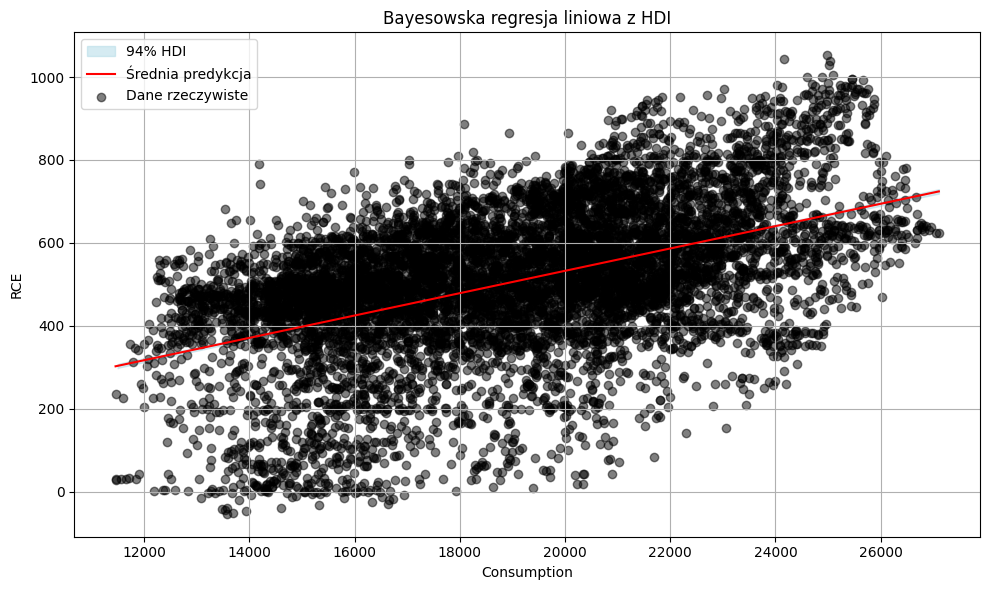

In [121]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd

# Przygotowanie danych
X = new_df['consumption'].values
Y = new_df['RCE'].values

# Normalizacja (opcjonalna, ale może pomóc w konwergencji)
X_mean, X_std = X.mean(), X.std()
X_norm = (X - X_mean) / X_std

# Model Bayesowski
with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=1)

    mu = alpha + beta * X_norm
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

    trace = pm.sample(1000, return_inferencedata=True, target_accept=0.95)

# Tworzenie predykcji dla zakresu X
X_pred = np.linspace(X_norm.min(), X_norm.max(), 100)
posterior = trace.posterior

# Wyciągamy próbki z posteriora
alpha_samples = posterior["alpha"].stack(draws=("chain", "draw")).values
beta_samples = posterior["beta"].stack(draws=("chain", "draw")).values

# Predykcja dla każdego x w X_pred
y_preds = np.array([alpha_samples + beta_samples * x for x in X_pred])  # shape: (100, n_samples)

# Wykres przedziału HDI
plt.figure(figsize=(10, 6))
pm.plot_hdi(X_pred * X_std + X_mean, y_preds.T, hdi_prob=0.94, color='lightblue', fill_kwargs={"label": "94% HDI"})

# Średnia predykcja
y_mean = y_preds.mean(axis=1)
plt.plot(X_pred * X_std + X_mean, y_mean, color="red", label="Średnia predykcja")

# Rzeczywiste dane
plt.scatter(X, Y, color="black", alpha=0.5, label="Dane rzeczywiste")

# Wykres
plt.xlabel("Consumption")
plt.ylabel("RCE")
plt.title("Bayesowska regresja liniowa z HDI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


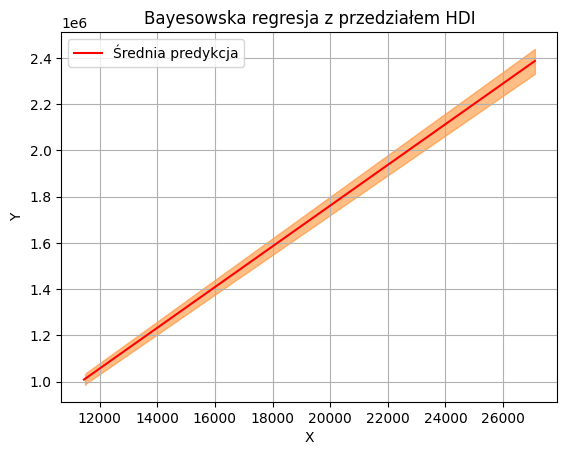

In [122]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

# Predykcja na podstawie modelu
posterior_samples = trace.posterior
alpha_post = posterior_samples['alpha'].mean().values
beta_post = posterior_samples['beta'].mean().values

# Wyciągamy próbki z posteriora
alpha_samples = posterior_samples["alpha"].stack(draws=("chain", "draw")).values  # shape: (n_samples,)
beta_samples = posterior_samples["beta"].stack(draws=("chain", "draw")).values    # shape: (n_samples,)

# Przygotowanie predykcji y dla każdego punktu X
X_pred = np.linspace(X.min(), X.max(), 100)  # lub X jeśli chcesz na oryginalnych punktach
y_preds = np.array([alpha_samples + beta_samples * x for x in X_pred])  # shape: (len(X_pred), n_samples)

# Wykres HDI
pm.plot_hdi(X_pred, y_preds.T, hdi_prob=0.94)

# (Opcjonalnie dorysuj średnią regresję)
y_mean = y_preds.mean(axis=1)
plt.plot(X_pred, y_mean, color="red", label="Średnia predykcja")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Bayesowska regresja z przedziałem HDI")
plt.legend()
plt.grid(True)
plt.show()


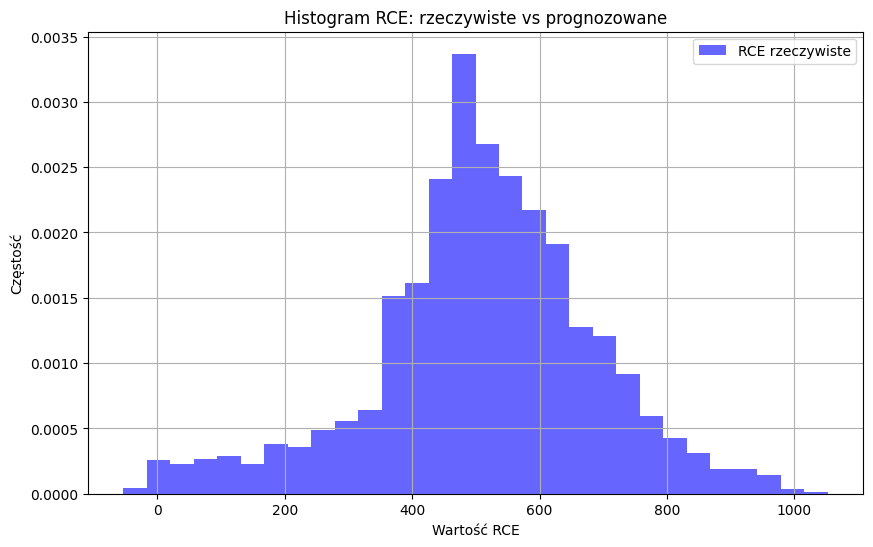

In [127]:
import matplotlib.pyplot as plt

# Histogram porównujący rzeczywiste i prognozowane RCE
plt.figure(figsize=(10, 6))
plt.hist(Y, bins=30, alpha=0.6, color='blue', label='RCE rzeczywiste',density=True)
# plt.hist(y_mean, bins=30, alpha=0.6, color='orange', label='RCE prognozowane (średnia)',density=True)

plt.title('Histogram RCE: rzeczywiste vs prognozowane')
plt.xlabel('Wartość RCE')
plt.ylabel('Częstość')
plt.legend()
plt.grid(True)
plt.show()
